# Import

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [26]:
# changing the max_columns value
pd.set_option("display.max_columns", None)

# set seaborn theme
sns.set_theme()

# Functions

In [221]:
def EDAplot(data=None, x=None, y=None):
    cor = round(df[y].corr(df[x]),3)
    
    fig = plt.figure(figsize=(8,2))
    fig.suptitle(f'{x} (corr: {cor})')
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    sns.histplot(data=data, x=x, kde=True, ax=ax1)
    sns.regplot(data=data, x=x, y=y, ax=ax2)
    
    return(plt.show())

# Data
**Auto-mpg dataset** - Mileage per gallon performances of various cars.

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. This dataset and the original dataset is available in Kaggle https://www.kaggle.com/datasets/uciml/autompg-dataset

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [17]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Web searches to find some missing data;

| Model          | horsepower |
|:--------------:|:----------:|
| ford pinto 71' | 75         |
| ford maverick 74' | 82      |
| renault lecar deluxe 80' | 50  |
| ford mustang cobra 80' | 88 |
| renault 18i 81' | 82 |
| amc concord dl 82' | 82 |

Add the hoesepower to the table

In [160]:
df.loc[32,'horsepower'] = 75
df.loc[126,'horsepower'] = 82
df.loc[330,'horsepower'] = 50
df.loc[336,'horsepower'] = 88
df.loc[354,'horsepower'] = 82
df.loc[374,'horsepower'] = 82
df['horsepower'] = df['horsepower'].astype(int)

In [168]:
df.describe().style.format(precision=0)  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398,398,398,398,398,398,398,398
mean,24,5,193,104,2970,16,76,2
std,8,2,104,38,847,3,4,1
min,9,3,68,46,1613,8,70,1
25%,18,4,104,75,2224,14,73,1
50%,23,4,148,92,2804,16,76,1
75%,29,8,262,125,3608,17,79,2
max,47,8,455,230,5140,25,82,3


# Exploratory Analysis

<AxesSubplot:>

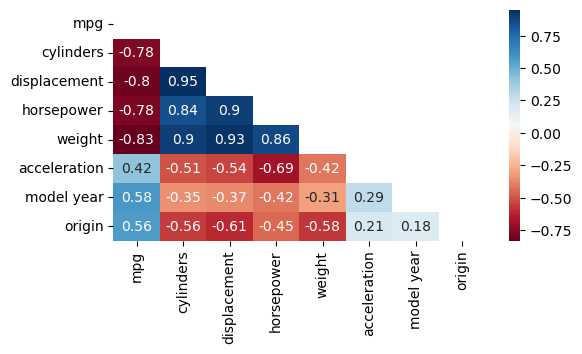

In [161]:
#correlation
plt.figure(figsize=(6,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),annot=True, mask=mask, cmap='RdBu')

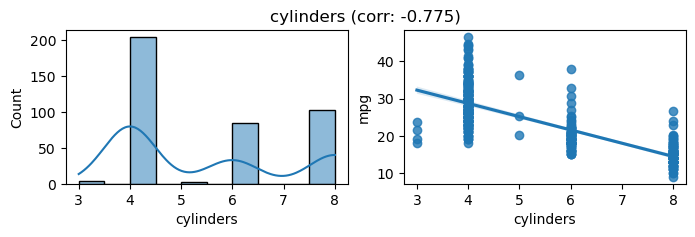

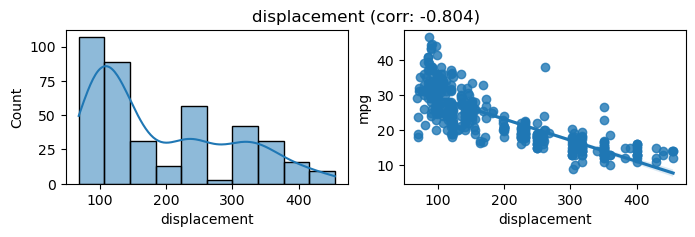

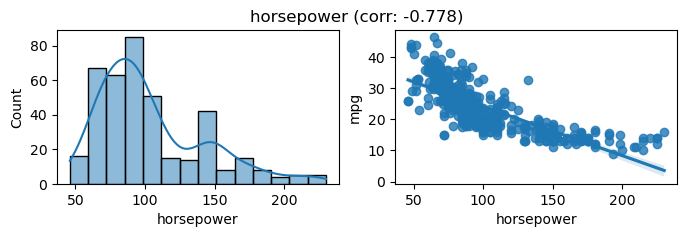

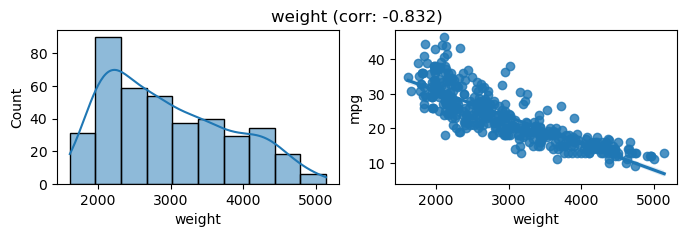

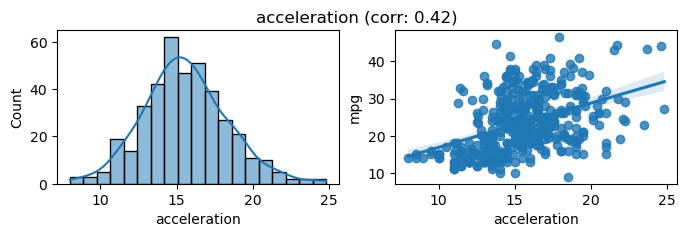

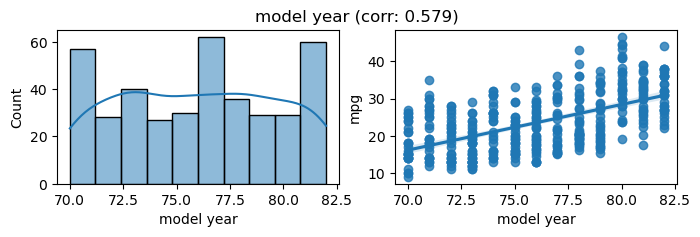

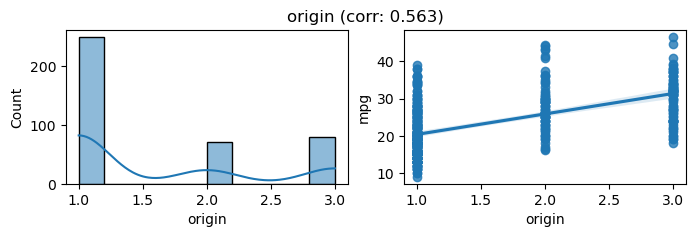

In [222]:
features = ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
for x in features:
    EDAplot(data=df, x=x, y='mpg')

### Summary
* Numerical variables - `cylinders`,`displacement`,`horsepower`,`weight`,`acceleration`,and `model year`
* Categorical variables - `origin`

# Linear Regression - 1
Build linear regression model with six numerical variables.

In [255]:
features = ['cylinders','displacement','horsepower', 'weight','acceleration', 'model year']
x = df[features]
y = df['mpg']
df_fit = pd.DataFrame(columns=['Model','R-squared','RMSE'])

### Split train and test set

In [256]:
#  spilt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Build pipeline

In [257]:
Input = [('scale',StandardScaler()), ('model',LinearRegression())]
pipe = Pipeline(Input)

### Fit

In [258]:
pipe.fit(x_train, y_train)
yhat_test = pipe.predict(x_test)
score = r2_score(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
df_fit.loc[len(df_fit)] = ['LinearRegression', score, rmse]
df_fit

,Model,R-squared,RMSE
0,LinearRegression,0.824335,3.07325


### Plot

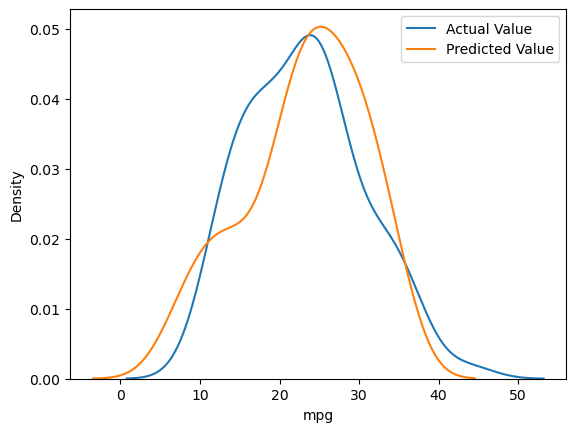

In [259]:
fig, ax = plt.subplots()
sns.kdeplot(y_test, label='Actual Value', ax=ax)
sns.kdeplot(yhat_test, label='Predicted Value', ax=ax)
ax.legend()
plt.show()

Text(0, 0.5, 'residuals')

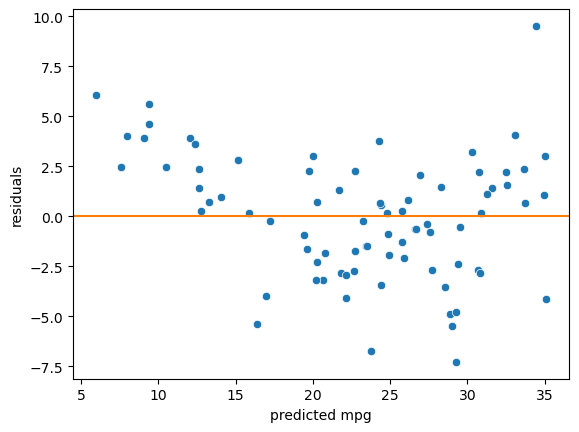

In [282]:
fig, ax = plt.subplots()
sns.scatterplot(x=yhat_test, y=y_test-yhat_test, ax=ax)
ax.axhline(y=0, color='tab:orange')
ax.set_xlabel('predicted mpg')
ax.set_ylabel('residuals')